### Implementation of stochastic and batch grandient descent in python

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

Using simple home prices data set

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X = df.drop('price', axis=1)
y = df['price']

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(len(X), 1)).reshape(len(X))

In [4]:
X_scaled[:5], y_scaled[:5]

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ]]),
 array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074]))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((16, 2), (4, 2))

**Helper functions**

In [6]:
def MSE(y_pred, y_true):
    return np.mean(np.square(y_true-y_pred))

def plot_cost_vs_epoch(epoch_list, cost_list):
    plt.figure(figsize=(3, 3))
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.plot(epoch_list, cost_list)

def predict(X, w, b):
    scaled_X = scaler_x.transform(X)
    y_pred = np.dot(w, scaled_X.T) + b 
    return scaler_y.inverse_transform([y_pred])

def model_evaluate(X, y, w, b):
    y_pred = np.dot(w, X.T) + b
    loss = MSE(y_pred, y)
    print('MSE:', loss)

#### Batch Gradient Descent

In [7]:
def batch_gradient_descent(X, y_true, epochs):
    n, num_features = X.shape # no of rows, no of features
    w = np.ones(num_features)
    b, learning_rate = 0, 0.5
    
    cost_list, epoch_list = [], []
    
    for i in range(epochs):
        y_pred = np.dot(w, X.T) + b
        loss = MSE(y_pred, y_true)
        w_grad = -(2/n) * np.dot(X.T, (y_true-y_pred))
        b_grad = -(2/n) * np.sum(y_true-y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        if i%10 == 0:
            print(f'Epoch: {i} - loss: {loss}')
            cost_list.append(loss)
            epoch_list.append(i)
            
    return w, b, loss, epoch_list, cost_list

Epoch: 0 - loss: 0.28411680803072636
Epoch: 10 - loss: 0.007063530789619413
Epoch: 20 - loss: 0.0052816211873927005
Epoch: 30 - loss: 0.004849556061328331
Epoch: 40 - loss: 0.004604768446951022
Epoch: 50 - loss: 0.004411017788316349
Epoch: 60 - loss: 0.004248395152354594
Epoch: 70 - loss: 0.004110782956529063
Epoch: 80 - loss: 0.003994207888462423
Epoch: 90 - loss: 0.0038954396546970887
Epoch: 100 - loss: 0.0038117566534340568
Epoch: 110 - loss: 0.0037408546810188004
Epoch: 120 - loss: 0.0036807816515864967
Epoch: 130 - loss: 0.003629883645439847
Epoch: 140 - loss: 0.003586759350399403
Epoch: 150 - loss: 0.003550221478584625
Epoch: 160 - loss: 0.003519264077990786
Epoch: 170 - loss: 0.003493034836824267
Epoch: 180 - loss: 0.0034708116178531847
Epoch: 190 - loss: 0.003451982576696346
Epoch: 200 - loss: 0.0034360293166692066
Epoch: 210 - loss: 0.0034225126164095527
Epoch: 220 - loss: 0.0034110603373394173
Epoch: 230 - loss: 0.0034013571780341987
Epoch: 240 - loss: 0.0033931359934188192
E

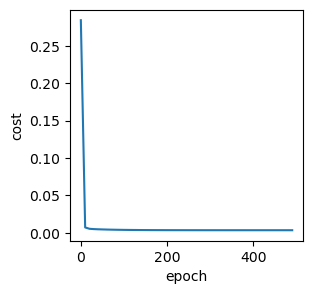

In [8]:
w, b, loss, epoch_list, cost_list = batch_gradient_descent(X_train, y_train, epochs=500)
plot_cost_vs_epoch(epoch_list, cost_list)

In [9]:
X1 = pd.DataFrame({
        "area": [2600, 1000, 1500],
        "bedrooms": [4, 2, 3]

    })
predict(X1, w, b)

array([[120.45819425,  38.43303582,  66.92984028]])

In [10]:
model_evaluate(X_test, y_test, w, b)

MSE: 0.001247952671332777


#### Stochastic Gradient Descent Implementation  
Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [11]:
import random

In [12]:
def stochastic_gradient_descent(X, y_true, epochs):
    total_samples, num_features = X.shape # no of rows, no of features
    w = np.ones(num_features)
    b, learning_rate = 0, 0.05
    
    cost_list, epoch_list = [], []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]
    
        y_pred = np.dot(w, sample_X.T) + b
        loss = MSE(y_pred, sample_y)
        w_grad = -(2/total_samples) * np.dot(sample_X.T, (sample_y-y_pred))
        b_grad = -(2/total_samples) * np.sum(sample_y-y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        if i%10 == 0:
            print(f'Epoch: {i} - loss: {loss}')
            cost_list.append(loss)
            epoch_list.append(i)
            
    return w, b, loss, epoch_list, cost_list

Epoch: 0 - loss: 0.08654717748972825
Epoch: 10 - loss: 0.8539031321816747
Epoch: 20 - loss: 0.7497127638011599
Epoch: 30 - loss: 0.022491577358084283
Epoch: 40 - loss: 0.1735630311852378
Epoch: 50 - loss: 0.22640365065259827
Epoch: 60 - loss: 0.11529494563862047
Epoch: 70 - loss: 0.4902682092060913
Epoch: 80 - loss: 0.08675390450226174
Epoch: 90 - loss: 0.06504388347325361
Epoch: 100 - loss: 0.3751724454438426
Epoch: 110 - loss: 0.030593357496856828
Epoch: 120 - loss: 0.07440599997899407
Epoch: 130 - loss: 0.017806011427094353
Epoch: 140 - loss: 0.05682799214471247
Epoch: 150 - loss: 0.03085695380471129
Epoch: 160 - loss: 0.03906787040330934
Epoch: 170 - loss: 0.024762006552506308
Epoch: 180 - loss: 0.0029502387157914938
Epoch: 190 - loss: 0.02651369537004857
Epoch: 200 - loss: 0.015753456455112273
Epoch: 210 - loss: 0.0001250964180753715
Epoch: 220 - loss: 0.001543378682582022
Epoch: 230 - loss: 0.007866830169411526
Epoch: 240 - loss: 0.08461772344132658
Epoch: 250 - loss: 0.024286330

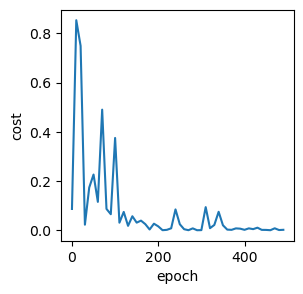

In [13]:
w, b, loss, epoch_list, cost_list = stochastic_gradient_descent(X_train, y_train, 500)
plot_cost_vs_epoch(epoch_list, cost_list)

In [14]:
predict(X1, w, b)

array([[133.92634691,  24.91470748,  68.52928866]])

In [15]:
model_evaluate(X_test, y_test, w, b)

MSE: 0.007622758646786542


#### Mini Batch Gradient Descent

In [18]:
def mini_batch_gradient_descent(X, y_true, epochs):
    total_samples, num_features = X.shape # no of rows, no of features
    w = np.ones(num_features)
    b, learning_rate = 0, 0.05
    
    sample_count = int(0.2 * total_samples)
    
    cost_list, epoch_list = [], []

    for i in range(epochs):
        random_indices = random.sample(range(total_samples), sample_count)
        sample_X = X[random_indices]
        sample_y = y_true[random_indices]
    
        y_pred = np.dot(w, sample_X.T) + b
        loss = MSE(y_pred, sample_y)
        w_grad = -(2/total_samples) * np.dot(sample_X.T, (sample_y-y_pred))
        b_grad = -(2/total_samples) * np.sum(sample_y-y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        if i%10 == 0:
            print(f'Epoch: {i} - loss: {loss}')
            cost_list.append(loss)
            epoch_list.append(i)
            
    return w, b, loss, epoch_list, cost_list

Epoch: 0 - loss: 0.3906954917366538
Epoch: 10 - loss: 0.15338454059650128
Epoch: 20 - loss: 0.05812022456648789
Epoch: 30 - loss: 0.06072903192222873
Epoch: 40 - loss: 0.10634804468924282
Epoch: 50 - loss: 0.016161917933095626
Epoch: 60 - loss: 0.0694130994432715
Epoch: 70 - loss: 0.01877908438874789
Epoch: 80 - loss: 0.02693907525564702
Epoch: 90 - loss: 0.03146535612942555
Epoch: 100 - loss: 0.03924328127332422
Epoch: 110 - loss: 0.03164951781073682
Epoch: 120 - loss: 0.03170470067933124
Epoch: 130 - loss: 0.0031145336998329477
Epoch: 140 - loss: 0.02449132480051676
Epoch: 150 - loss: 0.0009758901352654982
Epoch: 160 - loss: 0.02576248264501671
Epoch: 170 - loss: 0.009719333758707887
Epoch: 180 - loss: 0.001306874548729349
Epoch: 190 - loss: 0.051145273495113
Epoch: 200 - loss: 0.009600555650591073
Epoch: 210 - loss: 0.003968169265651957
Epoch: 220 - loss: 0.0026908099931593544
Epoch: 230 - loss: 0.008397531655831052
Epoch: 240 - loss: 0.02200185675900641
Epoch: 250 - loss: 0.0170134

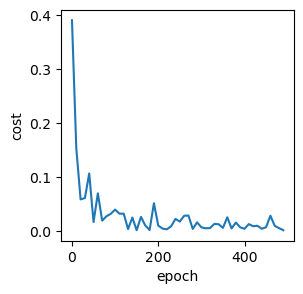

In [19]:
w, b, loss, epoch_list, cost_list = mini_batch_gradient_descent(X_train, y_train, 500)
plot_cost_vs_epoch(epoch_list, cost_list)

In [20]:
predict(X1, w, b)

array([[128.15629688,  31.09581391,  69.93775336]])

In [21]:
np.random.permutation(20)

array([ 0, 13,  4,  6, 12, 19,  9,  2,  1,  3, 10,  8, 17,  7, 18, 14,  5,
       15, 16, 11])